Final Exam-  Numeric Prediction: balance

#Context
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv
Detailed Column Descriptions
bank client data:

1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",  
"blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")    
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")  
# related with the last contact of the current campaign:   
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

Steps
1. ## Convert Categorical values to 0, 1
2. Create Training and Testing data, and check class distribution


In [1]:
import warnings 
warnings.simplefilter("ignore")  

import pandas as pd

data0=pd.read_excel('BankTrain.xlsx')

data0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data0.isnull().sum()  # get the number of missing data points per column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data0.shape

(45211, 17)

In [5]:
data0.head().transpose() 

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [6]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
cat_vars = ['poutcome', 'y', 'contact', 'job', 'default','month', 'marital','housing', 'day', 'duration', 'pdays']

In [8]:
data0.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
data0=data0.drop(['poutcome', 'y', 'contact','month','previous', 'day', 'duration', 'pdays' ], axis = 1)# We do not use Default as the X variable to predict loan_requested

In [10]:
#import ganesh_functions
#ganesh_functions.print_cat(data0, ['y','education', 'marital'])

In [11]:
cat_cols = data0.select_dtypes(include=object).columns.tolist()
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [12]:
a=   (pd.DataFrame(
        data0[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=True))
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))

b=   (pd.DataFrame(
        data0[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=False))
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))
b
#result =  a.merge(b, on=['column', 'counts'], how='left')

counts
column    value                
default   yes               815
          no              44396
education unknown          1857
          primary          6851
          tertiary        13301
          secondary       23202
housing   no              20081
          yes             25130
job       unknown           288
          student           938
          housemaid        1240
          unemployed       1303
          entrepreneur     1487
          self-employed    1579
          retired          2264
          services         4154
          admin.           5171
          technician       7597
          management       9458
          blue-collar      9732
loan      yes              7244
          no              37967
marital   divorced         5207
          single          12790
          married         27214

## Convert Categorical values to 0, 1

In [13]:
data_class = data0.copy()

In [14]:
cat_cols = data_class.select_dtypes(include=object).columns.tolist()
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [16]:
from final_exam_functions import cat_to_dummy_wt_adjustment
cat_cols = data_class.select_dtypes(include=object).columns.tolist()
data_class=cat_to_dummy_wt_adjustment(data0, data_class, cat_cols) #Convert categorical values to 0/1. Used for classification & numeric prediction   
data_class.head().transpose()

,0,1,2,3,4
age,58.000000,44.000000,33.000000,47.000000,33.000000
balance,2143.000000,29.000000,2.000000,1506.000000,1.000000
campaign,1.000000,1.000000,1.000000,1.000000,1.000000
job_admin.,0.000000,0.000000,0.000000,0.000000,0.000000
job_blue-collar,0.000000,0.000000,0.000000,0.083333,0.000000
job_entrepreneur,0.000000,0.000000,0.083333,0.000000,0.000000
job_housemaid,0.000000,0.000000,0.000000,0.000000,0.000000
job_management,0.083333,0.000000,0.000000,0.000000,0.000000
job_retired,0.000000,0.000000,0.000000,0.000000,0.000000
job_self-employed,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
data_class.corr()

,age,balance,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
age,1.000000,0.097783,0.004760,-0.055717,-0.044002,0.021792,0.086650,-0.023571,0.447378,-0.008093,...,0.196182,-0.093979,-0.081629,0.069665,0.017879,-0.017879,0.185513,-0.185513,0.015655,-0.015655
balance,0.097783,1.000000,-0.014578,-0.026726,-0.048757,0.009642,0.001661,0.067797,0.046900,0.017850,...,-0.015451,-0.069937,0.084001,0.011181,0.066745,-0.066745,0.068768,-0.068768,0.084350,-0.084350
campaign,0.004760,-0.014578,1.000000,-0.021868,0.008986,0.002128,0.003097,0.016686,-0.030913,0.005479,...,0.009616,-0.020893,0.012866,0.005704,-0.016822,0.016822,0.023599,-0.023599,-0.009980,0.009980
job_admin.,-0.055717,-0.026726,-0.021868,1.000000,-0.188216,-0.066273,-0.060349,-0.184835,-0.082511,-0.068364,...,-0.111364,0.217639,-0.144780,-0.014495,0.010037,-0.010037,-0.043046,0.043046,-0.030781,0.030781
job_blue-collar,-0.044002,-0.048757,0.008986,-0.188216,1.000000,-0.096585,-0.087951,-0.269376,-0.120251,-0.099633,...,0.342688,0.040548,-0.320541,0.014715,-0.010341,0.010341,-0.177475,0.177475,-0.018291,0.018291
job_entrepreneur,0.021792,0.009642,0.002128,-0.066273,-0.096585,1.000000,-0.030969,-0.094850,-0.042342,-0.035082,...,-0.014641,-0.054865,0.067639,0.009325,-0.026281,0.026281,-0.010600,0.010600,-0.039808,0.039808
job_housemaid,0.086650,0.001661,0.003097,-0.060349,-0.087951,-0.030969,1.000000,-0.086372,-0.038557,-0.031946,...,0.165842,-0.065396,-0.057004,-0.004048,0.000359,-0.000359,0.079380,-0.079380,0.017234,-0.017234
job_management,-0.023571,0.067797,0.016686,-0.184835,-0.269376,-0.094850,-0.086372,1.000000,-0.118091,-0.097843,...,-0.172773,-0.406124,0.598900,-0.040137,0.002655,-0.002655,0.063382,-0.063382,0.038904,-0.038904
job_retired,0.447378,0.046900,-0.030913,-0.082511,-0.120251,-0.042342,-0.038557,-0.118091,1.000000,-0.043678,...,0.127818,-0.036089,-0.066780,0.013290,0.011290,-0.011290,0.156633,-0.156633,0.014861,-0.014861
job_self-employed,-0.008093,0.017850,0.005479,-0.068364,-0.099633,-0.035082,-0.031946,-0.097843,-0.043678,1.000000,...,-0.036715,-0.056242,0.097417,-0.015696,-0.004107,0.004107,0.027319,-0.027319,0.007882,-0.007882


In [18]:
from sklearn.model_selection import train_test_split 
RMSE={}

X = data_class.drop(['balance'], axis = 1) 
y = data_class['balance']                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [19]:
## Numeric Prediction --- Linear Regerssion Lasso

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = Lasso()
lasso_model = GridSearchCV(model, param_grid={'alpha': [0,1]})
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

RMSE['LassoRMSE'] = mean_squared_error(y_test, y_pred_lasso,squared=False);

print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso,squared=False))
print('\nIntercept:',lasso_model.best_estimator_.intercept_)
print('\nCoefficients:\n',lasso_model.best_estimator_.coef_)
print(X_train.columns)


Lasso RMSE: 3086.0433540825

Intercept: -1490.4921448125679

Coefficients:
 [ 3.06683103e+01 -1.80553580e+01 -1.47895397e+03 -1.09694374e+03
  1.50503392e+03 -1.34313179e+03  1.62736771e+03  1.74147081e+02
  2.38705728e+03 -2.23926384e+03  2.68382914e+03 -6.83871185e+02
  1.09211136e+03 -1.02269457e+03 -1.18736104e+03 -1.71007898e+02
  5.82487667e+01 -1.46780974e+03 -1.04530955e+03  5.31432896e+02
 -5.51480901e+02  2.67250046e+03  8.09527334e-10  3.91026676e+02
  3.91281636e-14  1.18542835e+03 -1.28431522e-11]
Index(['age', 'campaign', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no

In [21]:
## Numeric Prediction --- Regression Tree

Tree RMSE: 3102.6435739094145

Feature Importance:
 [0.38604508 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.26843687 0.         0.         0.0284581  0.
 0.         0.         0.31705995]
Index(['age', 'campaign', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')


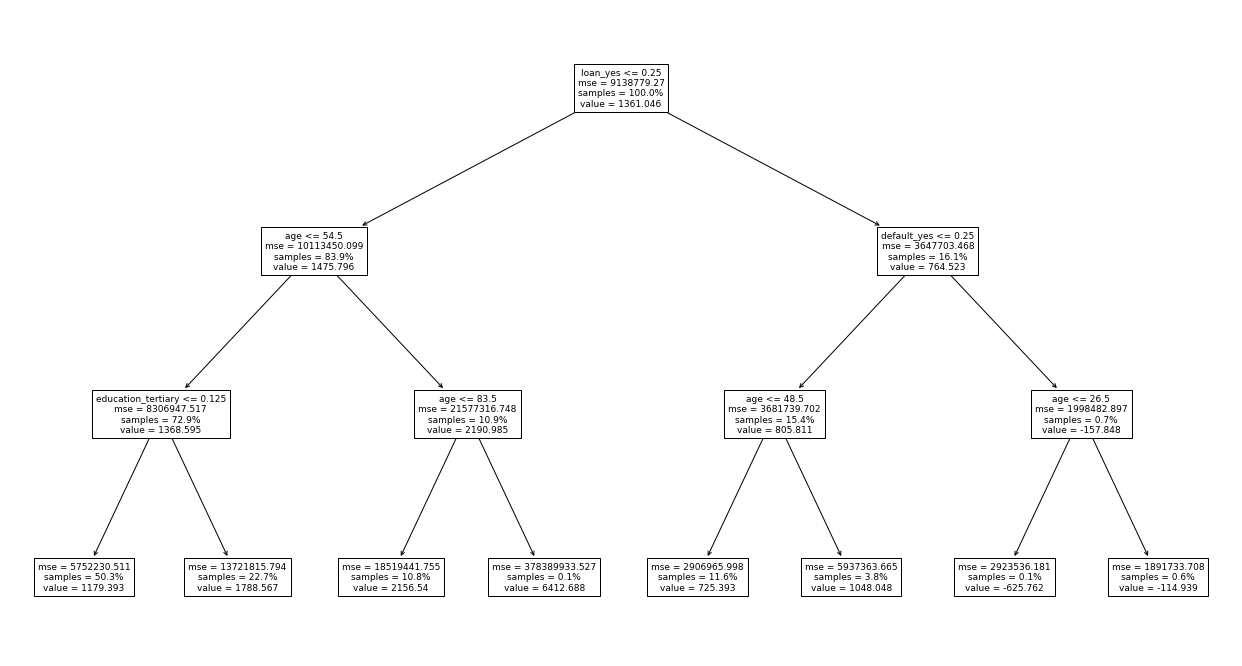

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

model = DecisionTreeRegressor()
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
RMSE['Tree_RMSE']  = mean_squared_error(y_test, y_pred_tree,squared=False)

print("Tree RMSE:", mean_squared_error(y_test, y_pred_tree,squared=False))
print('\nFeature Importance:\n',dt.best_estimator_.feature_importances_)
print(X_train.columns)

plt.subplots(figsize=(22, 12)) 
plot_tree(dt.best_estimator_, max_depth=3, feature_names=X_train.columns, proportion=True, fontsize=9) 
plt.show()

#Similarly, we can also use export_txt() to get the text three. 

In [23]:
##Numeric Prediction --- Random Forest¶

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() 
rf = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

RMSE['Forest_RMSE']  = mean_squared_error(y_test, y_pred_forest,squared=False)

print("Forest RMSE:", mean_squared_error(y_test, y_pred_forest,squared=False))

Forest RMSE: 3104.4210299642964


In [25]:
print(RMSE)

{'LassoRMSE': 3086.0433540825, 'Tree_RMSE': 3102.6435739094145, 'Forest_RMSE': 3104.4210299642964}


In [26]:
adf = pd.DataFrame([RMSE])
adf.head()

,LassoRMSE,Tree_RMSE,Forest_RMSE
0,3086.043354,3102.643574,3104.42103


##  Lasso has the best model. Lowest RMSE
Best features: Age, campaign, admin to predict bank balance

Coefficients:
 [ 3.06683103e+01 -1.80553580e+01 -1.47895397e+03 -1.09694374e+03
  1.50503392e+03 -1.34313179e+03  1.62736771e+03  1.74147081e+02
  2.38705728e+03 -2.23926384e+03  2.68382914e+03 -6.83871185e+02
  1.09211136e+03 -1.02269457e+03 -1.18736104e+03 -1.71007898e+02
  5.82487667e+01 -1.46780974e+03 -1.04530955e+03  5.31432896e+02
 -5.51480901e+02  2.67250046e+03  8.09527334e-10  3.91026676e+02
  3.91281636e-14  1.18542835e+03 -1.28431522e-11]
Index(['age', 'campaign', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')
